In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [3]:
df = pd.read_csv('data_bai2.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head(10)

,STT,Họ và tên,MSSV,Giới tính,Khóa,Khoa,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Phạm Tiến Hưng,23632401,1,3,Động lực,4,3,4,3,5,4,4,3,3,3,Không có,Không có,Không có
1,2,Lê Ngọc Trường Giang,24697331,1,4,Thương mại du lịch,3,3,4,3,5,4,5,5,4,5,Không có,Không có,Không có
2,3,Nguyễn Thị Trúc Hà,24696461,2,4,Quản trị kinh doanh,3,4,2,5,4,4,4,2,4,3,Không có,Không có,Không có
3,4,Mohammad Hanufi,23704721,1,3,Quản trị kinh doanh,3,3,3,4,3,4,5,3,4,4,Không có ý kiến,Tốt,Nâng cao hệ thống máy tính
4,5,Lê Minh Thắng,23687491,1,3,Quản trị kinh doanh,3,3,3,4,5,3,4,3,3,3,"Phòng trang bị thêm máy, Có thể cho thêm ghế ngồi",Cố hiền dễ thương,Không có
5,6,Đoàn Ngọc Mỹ Tâm,23640421,2,3,Quản trị kinh doanh,5,5,5,5,5,5,5,5,5,5,Thay thế máy tính mới,Tốt,Không có
6,7,Phùng Thị Như Quỳnh,23640511,2,3,Quản trị kinh doanh,5,5,4,5,4,4,5,4,5,4,Không,Vui vẻ,Không
7,8,Võ Lê Ánh Thu,23715711,2,3,Quản trị kinh doanh,4,5,5,5,5,4,5,5,5,4,Thể bố trí thêm nhiều bàn tự học hơn,Thân thiện,Không
8,9,Đăng Thị Thúy Ngân,24707631,2,4,Kế toán,4,4,3,2,5,5,4,4,4,4,Không có,Không có,Không có
9,10,Huỳnh Thị Mỹ Duyên,23722431,2,3,Thương mại du lịch,4,5,4,5,4,4,4,4,5,4,Không có,"Nghiêm túc, quản lý tốt",Không có


## Mô tả về dữ liệu:
- Dữ liệu là những thông tin thu được sau khi thực hiện cuộc khảo sát đối với sinh viên trường **Đại học Công nghiệp Thành phố Hồ Chí Minh**, với ý nghĩa các cột cụ thể như sau:
    + *STT*: số thứ tự
    + *Họ và tên*: họ và tên đầy đủ của sinh viên được khảo sát
    + *MSSV*: mã số sinh viên của sinh viên được khảo sát
    + *Giới tính*: giới tính của sinh viên được khảo sát (****1: Nam; 2: Nữ****)
    + *Khóa*: khóa mà sinh viên được khảo sát đang theo học (****1: K17; 2: K18; 3: K19; 4: K20; 5: Khác****)
    + *Khoa*: khoa mà sinh viên được khảo sát đang theo học
    + Các cột *1-10*: các câu hỏi khảo sát về mức độ đồng ý của sinh viên được thiết kế theo thang đo Likert với số điểm từ *1 đến 5* ứng với các mức độ từ **Hoàn toàn không đồng ý** đến **Hoàn toàn đồng ý**. Các câu hỏi này được chia vào *2* nhóm: 
        * **Nhóm 1** (các câu hỏi *1-5*): khảo sát về mức độ hài lòng của sinh viên về **Các thiết bị điện tử và kết nối mạng**
        * **Nhóm 2** (các câu hỏi *6-10*): khảo sát về mức độ hài lòng của sinh viên về **Không gian thư viện**
    + Các cột *11-13*: các câu hỏi với câu trả lời dạng text
- Trong bộ dữ liệu này:
    + Các cột *Họ và tên, MSSV, Giới tính, Khóa, Khoa* là các cột **đặc trưng cá nhân** của từng sinh viên
    + Các cột *1-13* là các *biến quan sát* dùng để **phân tích** và **trực quan hóa dữ liệu**

In [4]:
"""Tổng số phiếu đã khảo sát"""
len(df)

60

In [5]:
"""Một số mô tả cơ bản khác"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   STT        60 non-null     int64 
 1   Họ và tên  60 non-null     object
 2   MSSV       60 non-null     int64 
 3   Giới tính  60 non-null     int64 
 4   Khóa       60 non-null     int64 
 5   Khoa       60 non-null     object
 6   1          60 non-null     int64 
 7   2          60 non-null     int64 
 8   3          60 non-null     int64 
 9   4          60 non-null     int64 
 10  5          60 non-null     int64 
 11  6          60 non-null     int64 
 12  7          60 non-null     int64 
 13  8          60 non-null     int64 
 14  9          60 non-null     int64 
 15  10         60 non-null     int64 
 16  11         60 non-null     object
 17  12         60 non-null     object
 18  13         60 non-null     object
dtypes: int64(14), object(5)
memory usage: 9.0+ KB


In [6]:
"""Các khoa xuất hiện trong bộ dữ liệu khảo sát"""
print(df['Khoa'].unique())

['Động lực' 'Thương mại du lịch' 'Quản trị kinh doanh' 'Kế toán'
 'Công nghệ điện' 'Công nghệ thông tin' 'Công nghệ nhiệt'
 'Công nghệ điện tử' 'Ngoại ngữ' 'Công nghệ động lực']


## Các thống kê cơ bản

In [12]:
df.columns = ['stt', 'ho_ten', 'mssv', 'gioi_tinh', 'khoa_hoc', 'khoa', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13']
df.head(10)

,stt,ho_ten,mssv,gioi_tinh,khoa_hoc,khoa,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
0,1,Phạm Tiến Hưng,23632401,1,3,Động lực,4,3,4,3,5,4,4,3,3,3,Không có,Không có,Không có
1,2,Lê Ngọc Trường Giang,24697331,1,4,Thương mại du lịch,3,3,4,3,5,4,5,5,4,5,Không có,Không có,Không có
2,3,Nguyễn Thị Trúc Hà,24696461,2,4,Quản trị kinh doanh,3,4,2,5,4,4,4,2,4,3,Không có,Không có,Không có
3,4,Mohammad Hanufi,23704721,1,3,Quản trị kinh doanh,3,3,3,4,3,4,5,3,4,4,Không có ý kiến,Tốt,Nâng cao hệ thống máy tính
4,5,Lê Minh Thắng,23687491,1,3,Quản trị kinh doanh,3,3,3,4,5,3,4,3,3,3,"Phòng trang bị thêm máy, Có thể cho thêm ghế ngồi",Cố hiền dễ thương,Không có
5,6,Đoàn Ngọc Mỹ Tâm,23640421,2,3,Quản trị kinh doanh,5,5,5,5,5,5,5,5,5,5,Thay thế máy tính mới,Tốt,Không có
6,7,Phùng Thị Như Quỳnh,23640511,2,3,Quản trị kinh doanh,5,5,4,5,4,4,5,4,5,4,Không,Vui vẻ,Không
7,8,Võ Lê Ánh Thu,23715711,2,3,Quản trị kinh doanh,4,5,5,5,5,4,5,5,5,4,Thể bố trí thêm nhiều bàn tự học hơn,Thân thiện,Không
8,9,Đăng Thị Thúy Ngân,24707631,2,4,Kế toán,4,4,3,2,5,5,4,4,4,4,Không có,Không có,Không có
9,10,Huỳnh Thị Mỹ Duyên,23722431,2,3,Thương mại du lịch,4,5,4,5,4,4,4,4,5,4,Không có,"Nghiêm túc, quản lý tốt",Không có


#### Thống kê về giới tính của đối tượng tham gia khảo sát

In [13]:
gender_count = df.gioi_tinh.value_counts().reset_index()
gender_count.columns = ['gioi_tinh', 'so_luong']
gender_count.gioi_tinh = gender_count.gioi_tinh.replace({1: 'Nam', 2: 'Nữ'})
gender_count

,gioi_tinh,so_luong
0,Nam,45
1,Nữ,15


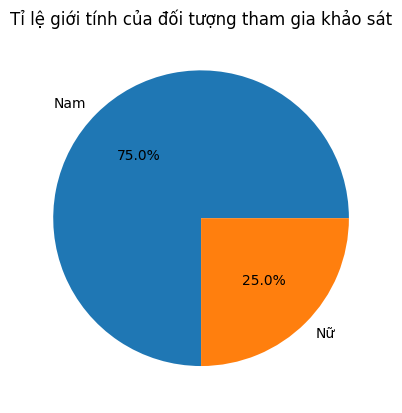

In [14]:
plt.pie(gender_count.so_luong, labels=gender_count.gioi_tinh, autopct='%1.1f%%')
plt.title('Tỉ lệ giới tính của đối tượng tham gia khảo sát')
plt.show();

#### Thống kê về khóa học của đối tượng tham gia khảo sát

In [16]:
khoa_hoc_all = pd.DataFrame({'khoa_hoc': ['K17', 'K18', 'K19', 'K20', 'Khac']})

khoa_hoc_count = df.khoa_hoc.value_counts().reset_index()
khoa_hoc_count.columns = ['khoa_hoc', 'so_luong']
khoa_hoc_count.khoa_hoc = khoa_hoc_count.khoa_hoc.replace({1: 'K17', 2: 'K18', 3: 'K19', 4: 'K20', 5: 'Khac'})
final_count = pd.merge(khoa_hoc_all, khoa_hoc_count, on='khoa_hoc', how='left').fillna(0).astype({'so_luong': int})
final_count

,khoa_hoc,so_luong
0,K17,0
1,K18,3
2,K19,54
3,K20,3
4,Khac,0


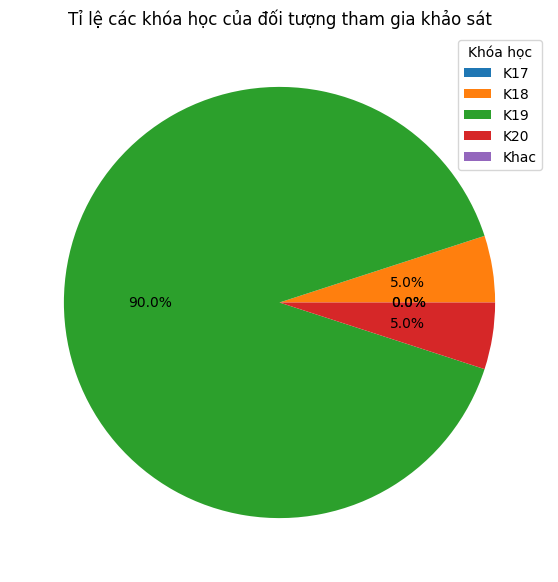

In [33]:
plt.figure(figsize=(7, 7))
plt.pie(final_count.so_luong, labels=None, autopct='%1.1f%%')
plt.title('Tỉ lệ các khóa học của đối tượng tham gia khảo sát')
plt.legend(final_count.khoa_hoc, title='Khóa học')
plt.show();

#### Thống kê dữ liệu các câu hỏi

In [119]:
likert = pd.DataFrame({'diem': [1, 2, 3, 4, 5]})
likert_descript = [
    '1: Hoàn toàn không đồng ý',
    '2: Không đồng ý',
    '3: Bình thường',
    '4: Đồng ý',
    '5: Hoàn toàn đồng ý'
]
ques = {'q1': 'Câu 1: Thư viện có đủ số lượng máy tính để đáp ứng đủ nhu cầu sử dụng của sinh viên.',
        'q2': 'Câu 2: Các máy tính trong thư viện hoạt động tốt, không bị giật lag khi sử dụng.', 
        'q3': 'Câu 3: Bàn ghế và ổ cắm điện tại khu vực máy tính được bố trí hợp lý, thuận tiện cho sinh viên học tập.', 
        'q4': 'Câu 4: Tình trạng mạng Wifi trong thư viện hoạt động ổn định và dễ dàng truy cập.',
        'q5': 'Câu 5: Hệ thống máy lạnh trong thư viện hoạt động tốt.',
        'q6': 'Câu 6: Không gian thư viện đủ rộng có thể phục vụ cho số lượng lớn sinh viên cùng lúc.', 
        'q7': 'Câu 7: Môi trường học tập trong thư viện yên tĩnh, giúp sinh viên tập trung hơn khi học.',
        'q8': 'Câu 8: Số lượng phòng họp nhóm đáp ứng được nhu cầu làm việc nhóm của sinh viên.',
        'q9': 'Câu 9: Cơ sở vật chất trong các phòng họp nhóm ở thư viện luôn được trang bị đầy đủ.',
        'q10': 'Câu 10: Khu vực ngồi nghỉ của sinh viên tại thư viện được bố trí hợp lý.'
        }

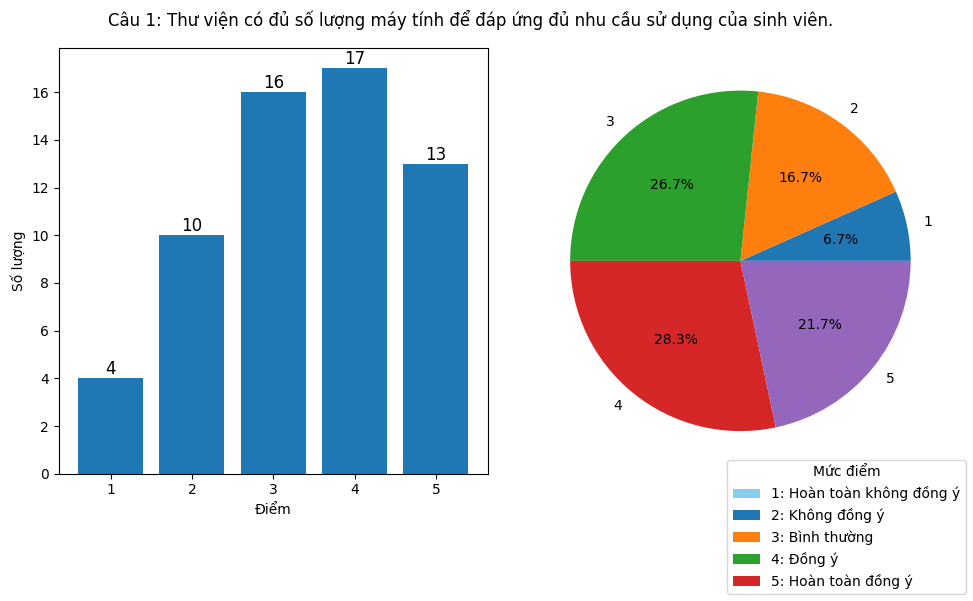

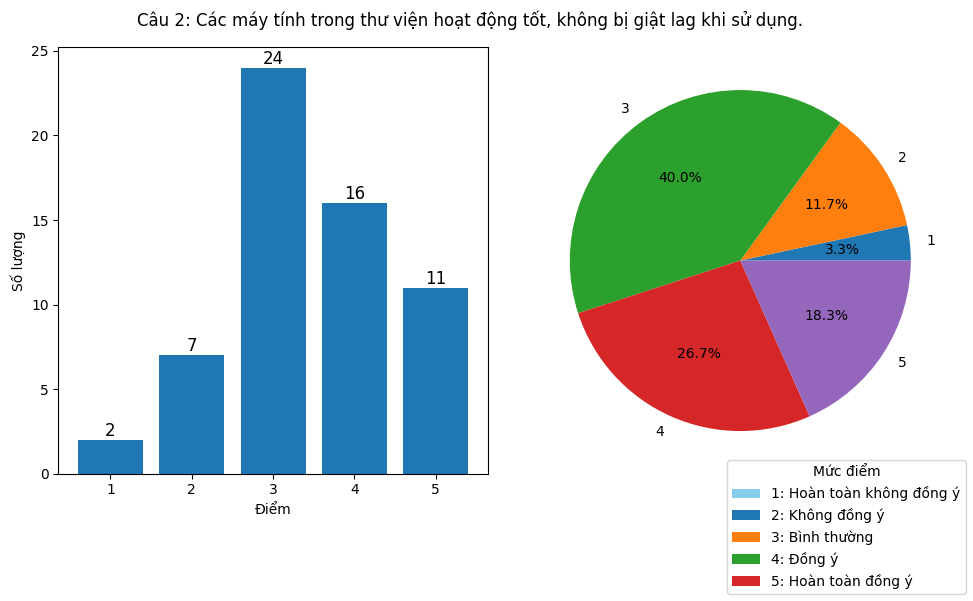

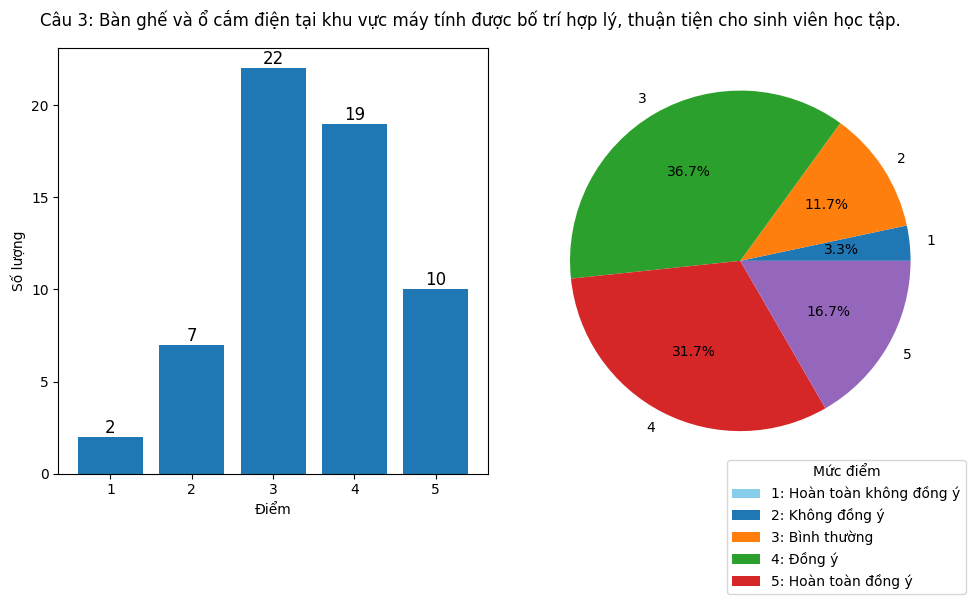

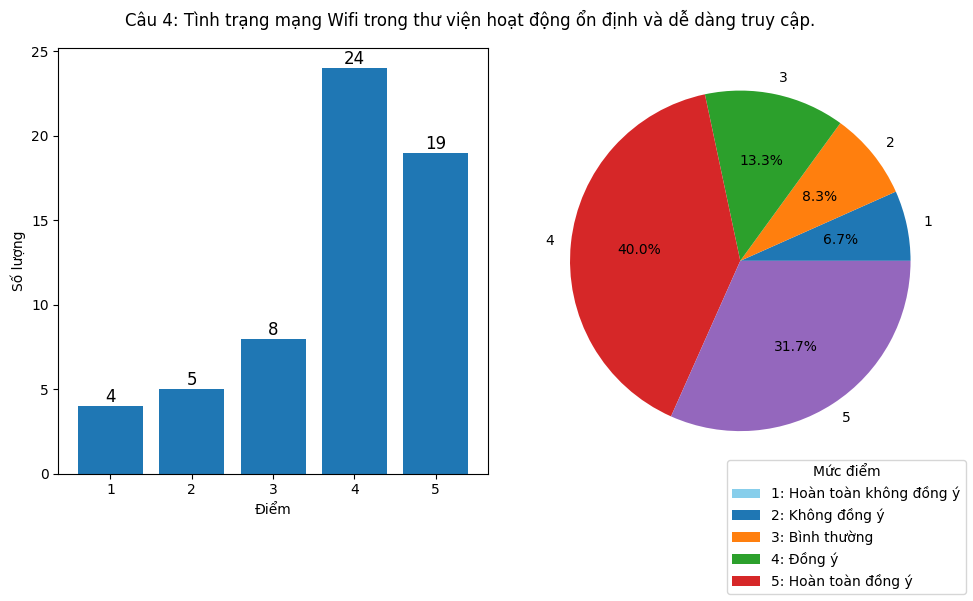

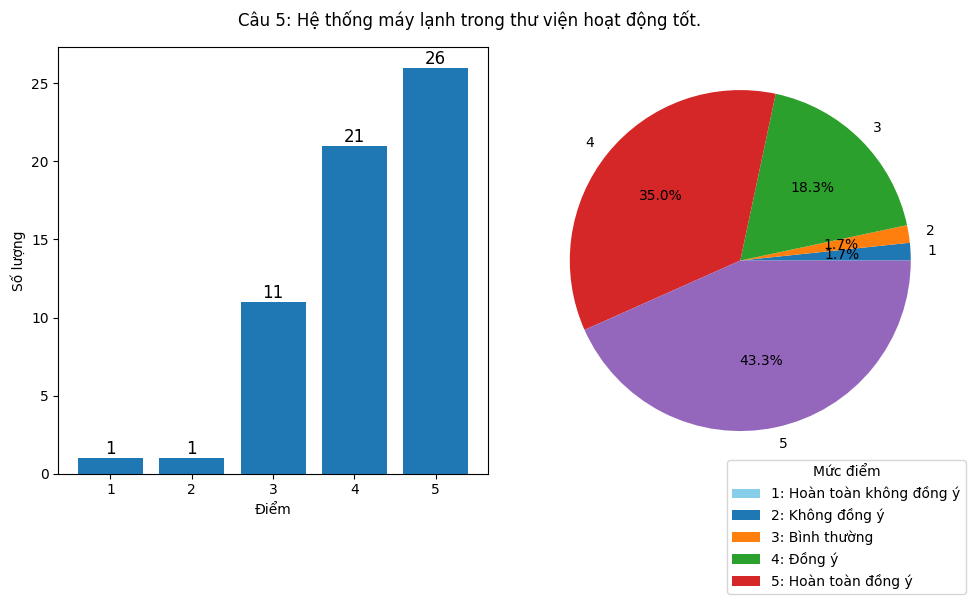

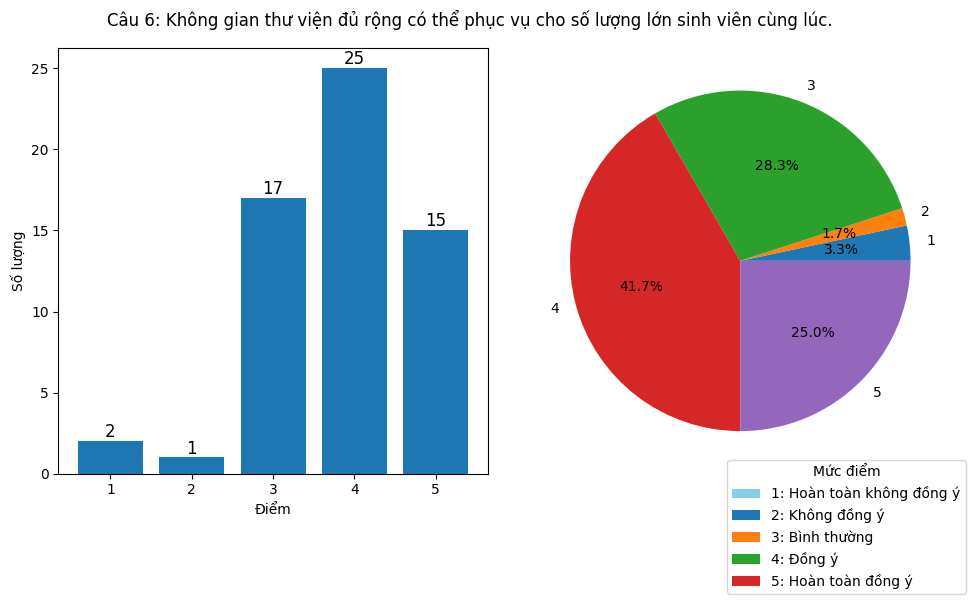

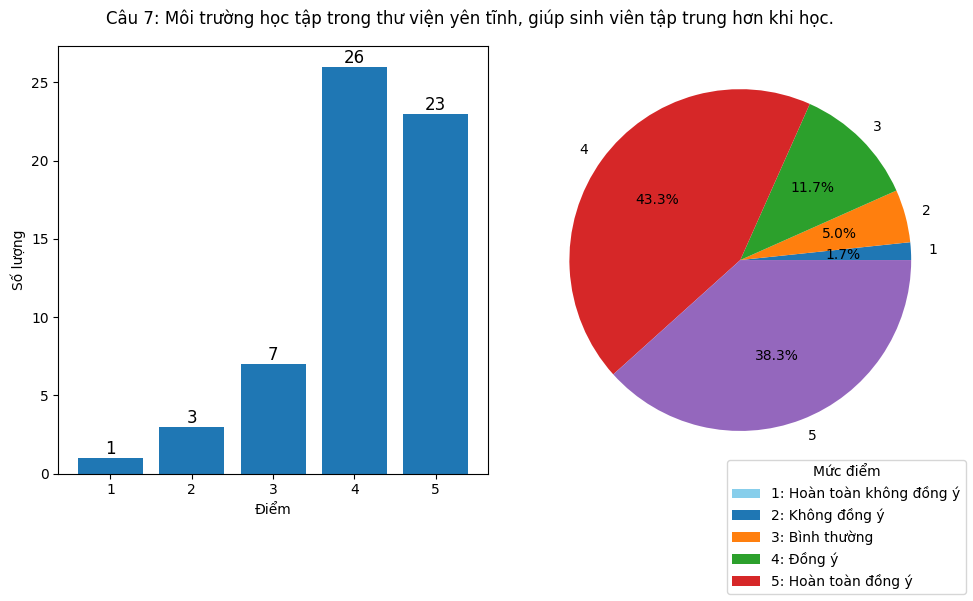

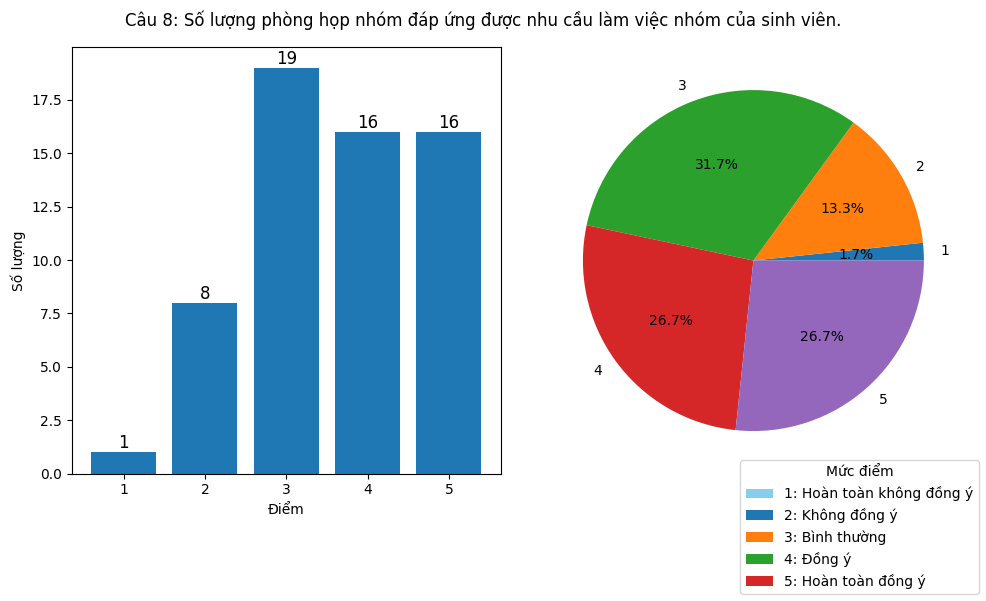

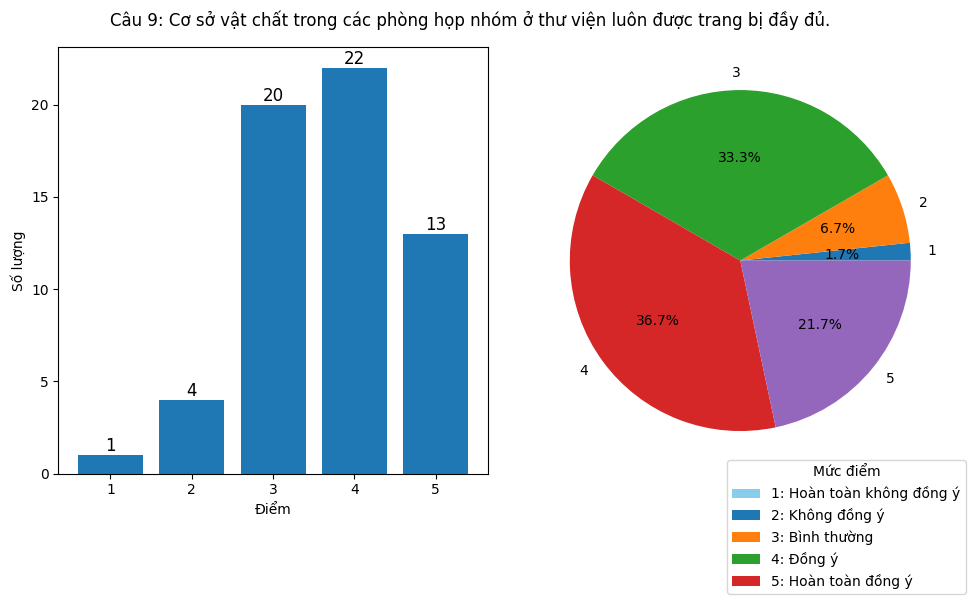

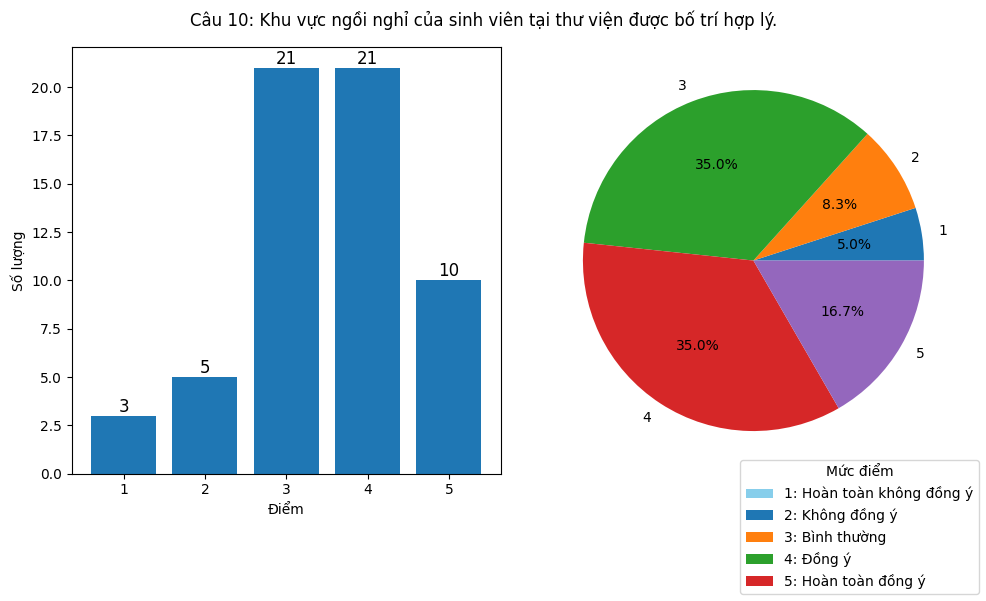

In [131]:
for Q_no, ques_statement in ques.items():
    # print(Q_no, ques_statement)
    Q_count = df[Q_no].value_counts().reset_index()
    Q_count.columns = ['diem', 'so_luong']
    Q_count = pd.merge(likert, Q_count, on='diem', how='left')

    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    fig.suptitle(ques_statement)
    bars = ax[0].bar(Q_count.diem, Q_count.so_luong)
    ax[0].set(xlabel='Điểm', ylabel='Số lượng', position=[.1, 0, .4, .2])

    for bar in bars:
        height = bar.get_height()
        ax[0].text(
            bar.get_x() + bar.get_width() / 2,  
            height,                         
            f'{height}',                        
            ha='center',                        
            va='bottom',                        
            fontsize=12
        )

    wedges, texts, autotexts = ax[1].pie(Q_count.so_luong, autopct='%1.1f%%', labels=Q_count.diem)

    all_handles = [
        plt.Rectangle((0,0), 1, 1, fc='skyblue'),  
        *wedges  
    ]
    labels = likert_descript
    fig.legend(
        all_handles,
        labels,
        title='Mức điểm', 
        loc='lower right'
    )

    plt.tight_layout()
    plt.show();

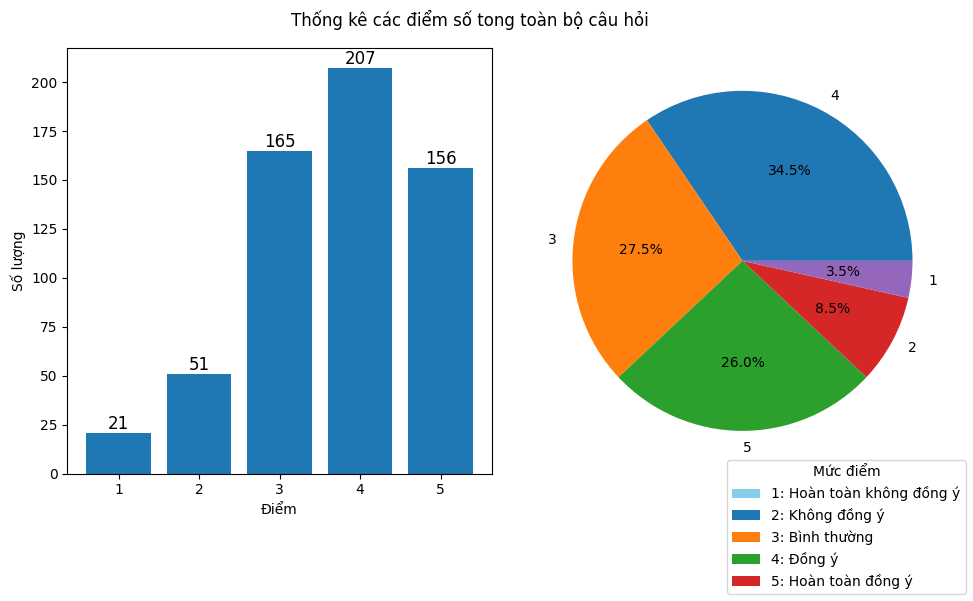

In [150]:
df_ques = df.iloc[:, 6:16]
tmp = pd.melt(df_ques)
score_whole_ques_count = tmp['value'].value_counts().reset_index()


fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Thống kê các điểm số tong toàn bộ câu hỏi')
bars = ax[0].bar(score_whole_ques_count.value, score_whole_ques_count['count'])
ax[0].set(xlabel='Điểm', ylabel='Số lượng', position=[.1, 0, .4, .2])

for bar in bars:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,  
        height,                         
        f'{height}',                        
        ha='center',                        
        va='bottom',                        
        fontsize=12
        )

wedges, texts, autotexts = ax[1].pie(score_whole_ques_count['count'], autopct='%1.1f%%', labels=score_whole_ques_count.value)

all_handles = [
    plt.Rectangle((0,0), 1, 1, fc='skyblue'),  
    *wedges  
]
labels = likert_descript
fig.legend(
    all_handles,
    labels,
    title='Mức điểm', 
    loc='lower right'
)

plt.tight_layout()
plt.show();